In [28]:
# Importe
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report

In [29]:
song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\cleanedData.csv')

In [30]:
song_data = song_data[["Genre","Lyrics","song_text_processed","Text_Length"]]
song_data = song_data.groupby('Genre').sample(500).reset_index(drop=True)

In [31]:
# Berechne die durchschnittliche Textlänge für jedes Genre
average_text_length_per_genre = song_data.groupby('Genre')['Text_Length'].mean().sort_values(ascending=False)


# Ausgabe der durchschnittlichen Textlängen für jedes Genre
print(average_text_length_per_genre)


Genre
Hip-Hop       2539.506
Pop           1526.382
R&B           1246.546
Metal         1079.610
Electronic    1028.292
Folk          1016.934
Indie         1008.580
Rock          1004.442
Country        944.624
Jazz           846.904
Name: Text_Length, dtype: float64


In [32]:
# Angenommen, 'unprocessed_lyrics' ist die Spalte mit den unverarbeiteten Songtexten

# Schritt 1: Definiere eine Funktion, die die Anzahl der Satzzeichen in einem Text zählt
def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

# Schritt 2: Wende diese Funktion auf jeden Songtext an, um die Anzahl der Satzzeichen zu zählen
song_data['punctuation_count'] = song_data['Lyrics'].apply(count_punctuation)

# Schritt 3: Berechne die durchschnittliche Anzahl von Satzzeichen für jedes Genre
average_punctuation_per_genre = song_data.groupby('Genre')['punctuation_count'].mean().sort_values(ascending=False)

# Ausgabe der durchschnittlichen Anzahl von Satzzeichen für jedes Genre
print(average_punctuation_per_genre)

Genre
Hip-Hop       94.634
Pop           52.320
R&B           40.692
Metal         36.418
Electronic    29.408
Indie         28.076
Rock          27.214
Jazz          25.540
Folk          24.374
Country       24.352
Name: punctuation_count, dtype: float64


In [35]:
def count_punctuation_types(text):
    punctuation_counts = Counter(char for char in text if char in string.punctuation)
    return punctuation_counts

# Beispielannahme: song_data ist deine DataFrame und enthält Spalten 'Genre' und 'unprocessed_lyrics'

# Wende die Funktion an und erstelle eine neue Spalte für die Zählung der Satzzeichenarten
song_data['punctuation_counts'] = song_data['Lyrics'].apply(count_punctuation_types)

# Initialisiere ein Dictionary, um die aggregierten Zählungen für jedes Genre zu speichern
aggregated_counts_per_genre = {genre: Counter() for genre in song_data['Genre'].unique()}

# Aggregiere die Zählungen für jedes Genre
for _, row in song_data.iterrows():
    aggregated_counts_per_genre[row['Genre']].update(row['punctuation_counts'])

# Berechne die Anzahl der Songs pro Genre
songs_per_genre = song_data['Genre'].value_counts()

# Berechne die durchschnittlichen Zählungen
average_counts_per_genre = {}
for genre, counts in aggregated_counts_per_genre.items():
    average_counts = {punct: count / songs_per_genre[genre] for punct, count in counts.items()}
    average_counts_per_genre[genre] = average_counts

# Optional: Ausgabe der durchschnittlichen Zählungen für jedes Genre
for genre, counts in average_counts_per_genre.items():
    print(f"Genre: {genre}")
    for punct, avg_count in counts.items():
        print(f"  {punct}: {avg_count:.2f}")
    print("\n")

Genre: Country
  ': 12.86
  (: 0.45
  ): 0.45
  ,: 6.05
  ;: 0.06
  -: 0.85
  ?: 0.48
  .: 1.89
  :: 0.16
  ": 0.33
  !: 0.12
  `: 0.01
  [: 0.29
  ]: 0.29
  /: 0.03
  *: 0.00
  _: 0.02
  &: 0.01


Genre: Electronic
  ': 11.05
  -: 1.05
  ,: 9.07
  .: 2.86
  !: 0.78
  ?: 1.00
  :: 0.19
  ": 0.19
  (: 1.19
  ): 1.20
  [: 0.29
  ]: 0.29
  #: 0.00
  &: 0.02
  /: 0.03
  %: 0.00
  *: 0.05
  ;: 0.05
  _: 0.12


Genre: Folk
  ,: 7.45
  -: 1.29
  ': 10.02
  ?: 1.01
  .: 2.36
  ": 0.65
  !: 0.25
  ;: 0.05
  :: 0.07
  [: 0.15
  ]: 0.15
  (: 0.44
  ): 0.44
  &: 0.01
  *: 0.00
  =: 0.01
  /: 0.00
  `: 0.00


Genre: Hip-Hop
  ,: 30.90
  ': 32.69
  -: 3.97
  (: 4.09
  ): 4.09
  ?: 3.39
  [: 2.06
  ]: 2.06
  .: 5.82
  ;: 0.14
  :: 1.03
  !: 1.67
  ": 1.79
  +: 0.05
  /: 0.06
  _: 0.00
  {: 0.05
  }: 0.05
  &: 0.10
  `: 0.08
  *: 0.41
  >: 0.03
  $: 0.07
  %: 0.01
  #: 0.01
  @: 0.00
  ~: 0.00
  <: 0.00


Genre: Indie
  ': 12.12
  ,: 8.20
  .: 2.92
  ?: 1.13
  (: 0.65
  ): 0.65
  [: 0.14
  ]: 0.14
  "

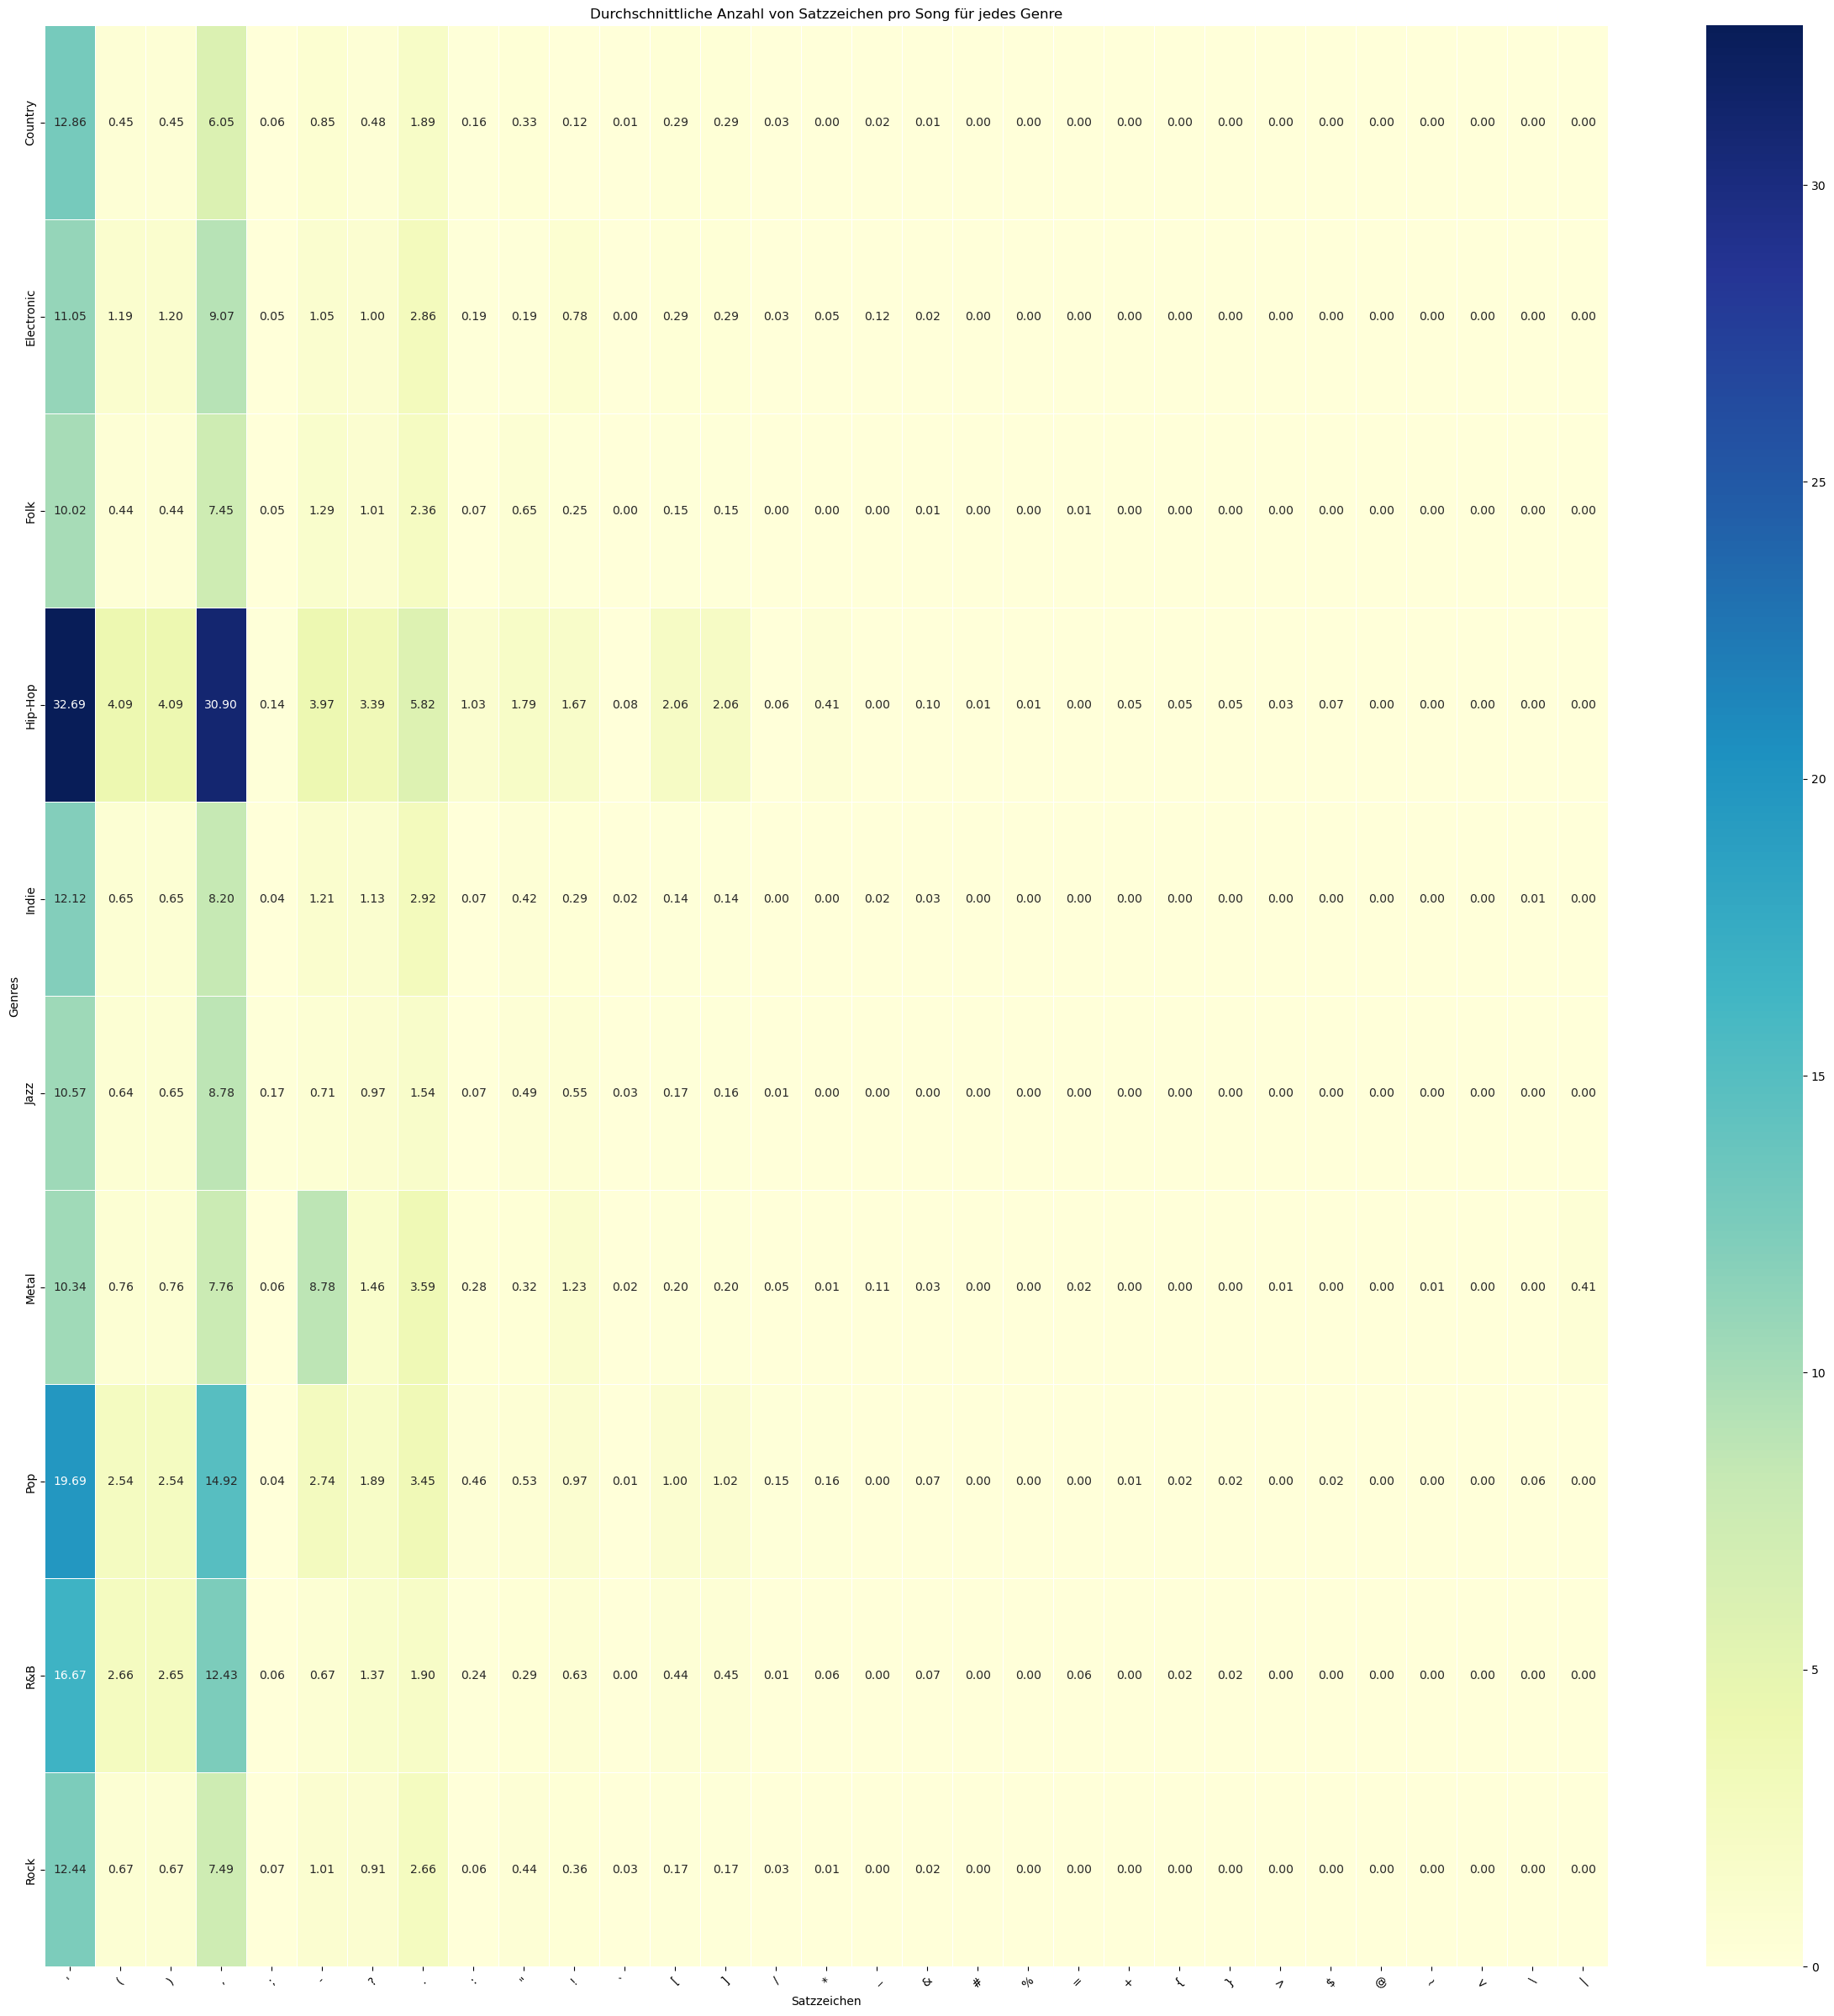

In [38]:
# Konvertiere das Dictionary der durchschnittlichen Zählungen in einen DataFrame
df_average_counts = pd.DataFrame.from_dict(average_counts_per_genre, orient='index').fillna(0)

plt.figure(figsize=(30, 30))
sns.heatmap(df_average_counts, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Durchschnittliche Anzahl von Satzzeichen pro Song für jedes Genre')
plt.xlabel('Satzzeichen')
plt.ylabel('Genres')
plt.xticks(rotation=45)
plt.show()